In [1]:
!pip3 install torch torchvision

In [2]:
pip show torch

Name: torch
Version: 1.7.0+cu101
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, dataclasses, future, typing-extensions
Required-by: torchvision, torchtext, fastai


In [3]:
pip show torchvision

Name: torchvision
Version: 0.8.1+cu101
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: torch, numpy, pillow
Required-by: fastai


In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [47]:
import torch
import torchvision

In [49]:
from torch import nn 
from torch import optim

* nn - формирование вычислительных графов для слоев нейронных сетей. TensorFlow: Keras.
* optim - алгоритмы оптимизации (SGD, Adam и т.д.). TensorFlow: модуль optimizers.
* Dataset – представление входных и выходных данных в разных форматах: TensorDataset, IterableDataset)
* DataLoader преобразует Dataset в формат, с помощью которого можно контролировать размера пакета (batch size), перемешивать данные, распределять процессы и т.д. В TensorFlow за это отвечает модуль data.

### Линейное преобразование

In [ ]:
linear = nn.Linear(2, 2)

In [ ]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.4772, -0.4287],
        [-0.0383, -0.2576]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0546,  0.1970], requires_grad=True)


Функция потерь:

In [ ]:
criterion = nn.MSELoss()

И для метода оптимизации мы используем градиентный стохастический спуск. Мы должны передавать в функцию параметры нашей модели:

In [ ]:
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [ ]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

Прежде чем передать наши данные в модель, мы должны обнулить градиент нашего оптимайзера с помощью zero_grad. это нужно делать перед каждой передачей наших данных модели.
И мы высчитываем нашу ошибку, используя предсказанные данные и наши лейблы с помощью функций потерь:

In [ ]:
optimizer.zero_grad()
pred = linear(x)
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  0.3003738522529602


In [ ]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  None
dL/db:  None


тут высчитываем градиенты:

In [ ]:
loss.backward()

In [ ]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-0.2884,  0.1187],
        [ 0.1939, -0.0798]])
dL/db:  tensor([ 0.6432, -0.4325])


In [ ]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.4772, -0.4287],
        [-0.0383, -0.2576]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0546,  0.1970], requires_grad=True)


А тут обновляем параметры нашего градиента с помощью шага оптимизации:

In [ ]:
optimizer.step()

In [ ]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[-0.4743, -0.4299],
        [-0.0403, -0.2568]], requires_grad=True)
b:  Parameter containing:
tensor([-0.0610,  0.2014], requires_grad=True)


#### Загрузка существующего датасета:

Теперь посмотрим как все это работает с помощью реального датасета:

In [50]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [198]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

Будем рассматривать датасет CIFAR10, который представлен в библиотеке torchvision. 

In [199]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/', # путь куда будут скачиваться наши данные(если download=true), 
                                                                 # или где лежат наши данные(dowload=False)
                                             train=True, # говорим что используем датасет для обучения  
                                             transform=transform_train, # важная строчка: здесь мы преобразуем данные
                                                                                # из датасета в формат тензоров из торч
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


Что бы вывести, наше изображение, нам нужно воспользоваться функцией permute и поменять размерности:

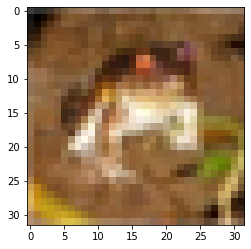

In [11]:
plt.imshow(image.permute(1, 2, 0).numpy())

Теперь скачав датасет, нам нужно его как-то оформить для загрузки в нашу модель. Делается это с помощью DataLoader:

In [200]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)

In [201]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                         shuffle=False)

Files already downloaded and verified


In [54]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [55]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Определим следующую модель:

In [207]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)
        return x


net = Net().to(device)

In [203]:
net

Net(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [208]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [209]:
for epoch in range(15):  # 10 эпох 
    running_loss = 0.0 # Для вывода процесса обучения
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # Обнуляем градиент
        optimizer.zero_grad()
    
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        m = 300
        if i % m == 0:    # печатаем каждые 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / m))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.008
[1,   301] loss: 1.950
[1,   601] loss: 1.758
[1,   901] loss: 1.639
[1,  1201] loss: 1.562
[1,  1501] loss: 1.468
[2,     1] loss: 0.005
[2,   301] loss: 1.395
[2,   601] loss: 1.369
[2,   901] loss: 1.295
[2,  1201] loss: 1.273
[2,  1501] loss: 1.229
[3,     1] loss: 0.005
[3,   301] loss: 1.194
[3,   601] loss: 1.159
[3,   901] loss: 1.101
[3,  1201] loss: 1.100
[3,  1501] loss: 1.076
[4,     1] loss: 0.004
[4,   301] loss: 1.036
[4,   601] loss: 1.038
[4,   901] loss: 0.988
[4,  1201] loss: 0.985
[4,  1501] loss: 0.991
[5,     1] loss: 0.003
[5,   301] loss: 0.930
[5,   601] loss: 0.929
[5,   901] loss: 0.926
[5,  1201] loss: 0.899
[5,  1501] loss: 0.898
[6,     1] loss: 0.003
[6,   301] loss: 0.880
[6,   601] loss: 0.859
[6,   901] loss: 0.861
[6,  1201] loss: 0.845
[6,  1501] loss: 0.811
[7,     1] loss: 0.003
[7,   301] loss: 0.805
[7,   601] loss: 0.824
[7,   901] loss: 0.800
[7,  1201] loss: 0.802
[7,  1501] loss: 0.791
[8,     1] loss: 0.004
[8,   301] 

#### Сохранение модели

In [210]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [211]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv_layer.0.weight  \  torch.Size([32, 3, 3, 3])
conv_layer.0.bias  \  torch.Size([32])
conv_layer.1.weight  \  torch.Size([32])
conv_layer.1.bias  \  torch.Size([32])
conv_layer.1.running_mean  \  torch.Size([32])
conv_layer.1.running_var  \  torch.Size([32])
conv_layer.1.num_batches_tracked  \  torch.Size([])
conv_layer.3.weight  \  torch.Size([64, 32, 3, 3])
conv_layer.3.bias  \  torch.Size([64])
conv_layer.6.weight  \  torch.Size([128, 64, 3, 3])
conv_layer.6.bias  \  torch.Size([128])
conv_layer.7.weight  \  torch.Size([128])
conv_layer.7.bias  \  torch.Size([128])
conv_layer.7.running_mean  \  torch.Size([128])
conv_layer.7.running_var  \  torch.Size([128])
conv_layer.7.num_batches_tracked  \  torch.Size([])
conv_layer.9.weight  \  torch.Size([128, 128, 3, 3])
conv_layer.9.bias  \  torch.Size([128])
conv_layer.13.weight  \  torch.Size([256, 128, 3, 3])
conv_layer.13.bias  \  torch.Size([256])
conv_layer.14.weight  \  torch.Size([256])
conv_layer.14.bias  \  to

#### Загрузка и использование модели 

In [212]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [213]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane


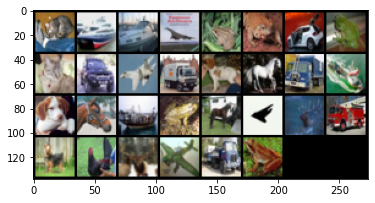

In [38]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(28)))

In [214]:
sum = 0
max = 0
for i, data in enumerate(test_loader, 0):
    inputs, labels = data[0].to(device), data[1]
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.to('cpu')
    if labels.numpy()[0] == predicted.numpy()[0]:
      sum += 1
    max += 1

print(sum/max)

0.5912
